In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [21]:
df = pd.read_csv("order.csv.csv")
df.head()


,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


In [23]:
df.shape


(3500, 7)

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   object 
 1   Product Name  3500 non-null   object 
 2   Category      3500 non-null   object 
 3   Region        3500 non-null   object 
 4   Quantity      3500 non-null   int64  
 5   Sales         3500 non-null   int64  
 6   Profit        3500 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 191.5+ KB


In [27]:
df.describe()



,Quantity,Sales,Profit
count,3500.000000,3500.000000,3500.000000
mean,4.931714,3047.966000,527.047203
std,2.575895,2440.213237,504.139732
min,1.000000,51.000000,6.970000
25%,3.000000,1049.500000,158.695000
50%,5.000000,2350.500000,361.070000
75%,7.000000,4537.000000,729.125000
max,9.000000,10782.000000,2946.930000


In [29]:
df.isnull().sum()



Order Date      0
Product Name    0
Category        0
Region          0
Quantity        0
Sales           0
Profit          0
dtype: int64

In [31]:
df["Order Date"] = pd.to_datetime(df["Order Date"])


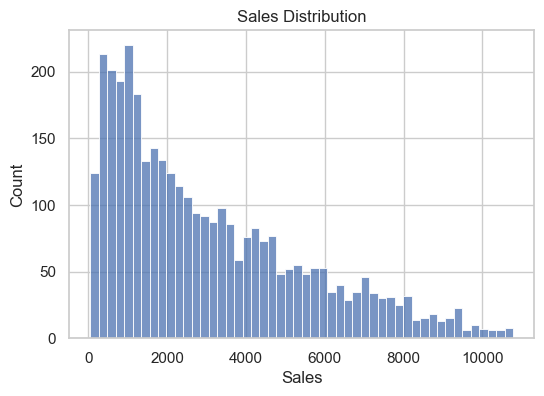

In [33]:
plt.figure(figsize=(6,4))
sns.histplot(df["Sales"], bins=50)
plt.title("Sales Distribution")
plt.show()


In [35]:
category_summary = df.groupby("Category")[["Sales","Profit"]].sum().reset_index()
category_summary


,Category,Sales,Profit
0,Accessories,4247591,736084.74
1,Electronics,5326074,923185.59
2,Office,1094216,185394.88


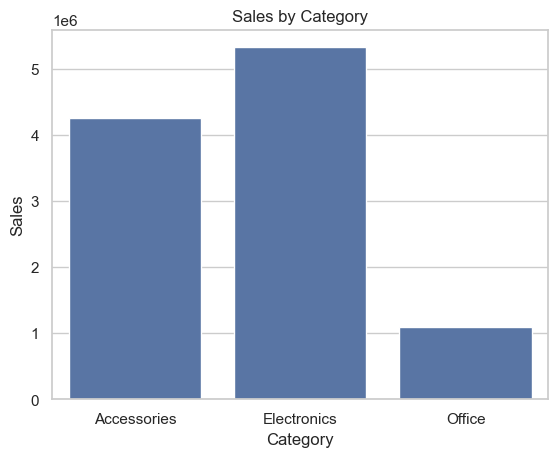

In [37]:
sns.barplot(data=category_summary, x="Category", y="Sales")
plt.title("Sales by Category")
plt.show()


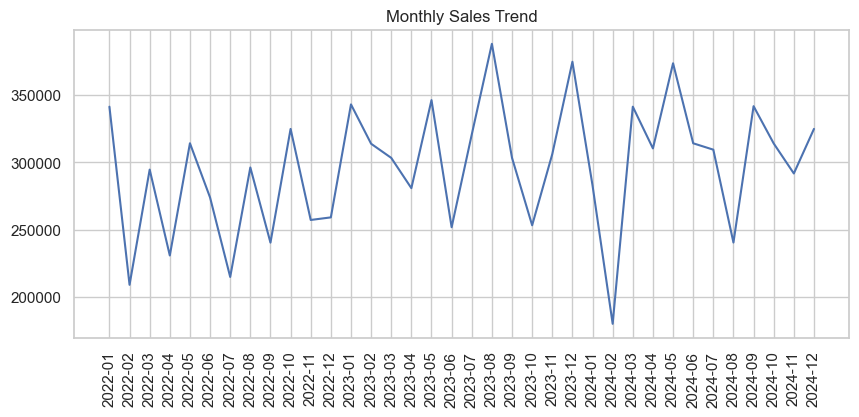

In [39]:
df["Month"] = df["Order Date"].dt.to_period("M").astype(str)
monthly_sales = df.groupby("Month")["Sales"].sum().reset_index()

plt.figure(figsize=(10,4))
plt.plot(monthly_sales["Month"], monthly_sales["Sales"])
plt.xticks(rotation=90)
plt.title("Monthly Sales Trend")
plt.show()
